<a href="https://colab.research.google.com/github/NishaniKasineshan/DeepLearning-Projects/blob/main/Cats%26Dogs_classification_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nishanikasineshan","key":"8d3ca28c3cefdd91fc84a46a594b1404"}'}

In [10]:
!mkdir ~/.kaggle

In [11]:
!cp kaggle.json ~/.kaggle/

In [12]:
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

 76% 49.0M/64.4M [00:00<00:00, 119MB/s]
100% 64.4M/64.4M [00:00<00:00, 128MB/s]


In [14]:
!unzip '/content/cats-and-dogs-image-classification.zip'

Archive:  /content/cats-and-dogs-image-classification.zip
  inflating: test/cats/cat_1.jpg     
  inflating: test/cats/cat_106.jpg   
  inflating: test/cats/cat_109.jpg   
  inflating: test/cats/cat_113.jpg   
  inflating: test/cats/cat_114.jpg   
  inflating: test/cats/cat_116.jpg   
  inflating: test/cats/cat_118.jpg   
  inflating: test/cats/cat_119.jpg   
  inflating: test/cats/cat_124.jpg   
  inflating: test/cats/cat_140.jpg   
  inflating: test/cats/cat_147.jpg   
  inflating: test/cats/cat_156.jpg   
  inflating: test/cats/cat_158.jpg   
  inflating: test/cats/cat_162.jpg   
  inflating: test/cats/cat_18.jpg    
  inflating: test/cats/cat_190.jpg   
  inflating: test/cats/cat_203.jpg   
  inflating: test/cats/cat_223.jpg   
  inflating: test/cats/cat_234.jpg   
  inflating: test/cats/cat_244.jpg   
  inflating: test/cats/cat_251.jpg   
  inflating: test/cats/cat_255.jpg   
  inflating: test/cats/cat_268.jpg   
  inflating: test/cats/cat_279.jpg   
  inflating: test/cats/cat_281

In [31]:
#import required libraries
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [2]:
train_dir='/content/train'
test_dir='/content/test'

In [8]:
x_train=[]
x_test=[]

for folder in os.listdir(train_dir):
  sub_path=train_dir+"/"+folder
  for img in os.listdir(sub_path):
    img_path=sub_path+"/"+img
    img_arr=cv2.imread(img_path)
    img_arr=cv2.resize(img_arr,(500,500))
    x_train.append(img_arr)

for folder in os.listdir(test_dir):
  sub_path=test_dir+"/"+folder
  for img in os.listdir(sub_path):
    img_path=sub_path+"/"+img
    img_arr=cv2.imread(img_path)
    img_arr=cv2.resize(img_arr,(500,500))
    x_test.append(img_arr)

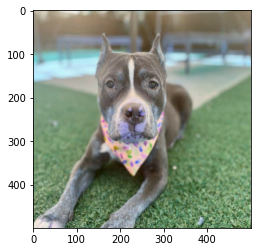

In [10]:
im=Image.fromarray(x_train[0])
plt.imshow(im)

In [11]:
im.size

(500, 500)

In [12]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [14]:
x_train=x_train/255.0
x_test=x_test/255.0

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [18]:
model=Sequential()
model.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit_generator(training_set,epochs=30,validation_data=test_set)

<ipython-input-21-c78559786341>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training_set,epochs=30,validation_data=test_set)


Epoch 1/30
18/18 [==============================] - 9s 467ms/step - loss: 0.7206 - accuracy: 0.5189 - val_loss: 0.7175 - val_accuracy: 0.5143
Epoch 2/30
18/18 [==============================] - 8s 445ms/step - loss: 0.6733 - accuracy: 0.5512 - val_loss: 0.6842 - val_accuracy: 0.5500
Epoch 3/30
18/18 [==============================] - 7s 414ms/step - loss: 0.6251 - accuracy: 0.6643 - val_loss: 0.7268 - val_accuracy: 0.5357
Epoch 4/30
18/18 [==============================] - 9s 486ms/step - loss: 0.6308 - accuracy: 0.6284 - val_loss: 0.6828 - val_accuracy: 0.5857
Epoch 5/30
18/18 [==============================] - 9s 485ms/step - loss: 0.5946 - accuracy: 0.6912 - val_loss: 0.6816 - val_accuracy: 0.5786
Epoch 6/30
18/18 [==============================] - 10s 570ms/step - loss: 0.5335 - accuracy: 0.7828 - val_loss: 0.6499 - val_accuracy: 0.6571
Epoch 7/30
18/18 [==============================] - 8s 455ms/step - loss: 0.4779 - accuracy: 0.8061 - val_loss: 0.6655 - val_accuracy: 0.6143
Epoch

In [22]:
model.evaluate(test_set)

5/5 [==============================] - 1s 287ms/step - loss: 1.1899 - accuracy: 0.6357


[1.189937949180603, 0.6357142925262451]

In [27]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [41]:
predict_img=image.load_img('/content/bull_dog.jpg',target_size=(64,64))
predict_modified = image.img_to_array(predict_img)
predict_modified = predict_modified / 255
predict_modified = np.expand_dims(predict_modified, axis = 0)
prediction= model.predict(predict_modified)
if prediction[0][0] >= 0.5:
  pred = 'dog'
  probability = prediction[0][0]
  print ("probability = " + str(probability))
  print("Prediction = " + pred)
else:
  pred = 'cat'
  probability = 1 - prediction[0][0]
  print ("probability = " + str(probability))
  print("Prediction = " + pred)

1/1 [==============================] - 0s 31ms/step
probability = 0.9892852
Prediction = dog
